In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [24]:
# Load the data from the Excel file
file_path = 'data\Pseudo Data Sheet1.xlsx'  # Replace with the path to your file
data = pd.read_excel(file_path, sheet_name='in')

# Drop unnecessary columns (those after "Play Grade")
cleaned_data = data.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Grade Criteria'])

# Drop rows where "Play Grade" is missing
cleaned_data = cleaned_data.dropna(subset=['Play Grade'])

# Separate the features (X) from the target variable (y)
X = cleaned_data.drop(columns=['Play Grade'])
y = cleaned_data['Play Grade']


In [25]:
# Encode categorical columns using OneHotEncoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Handle missing values: Use mean for numerical columns and most frequent for categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Separate numerical and categorical columns
numerical_cols = X_encoded.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_encoded.select_dtypes(include=['uint8']).columns

# Impute missing values for numerical columns
X_encoded[numerical_cols] = numerical_imputer.fit_transform(X_encoded[numerical_cols])

# Check if there are missing values in the categorical columns before applying the imputer
missing_categorical = X_encoded[categorical_cols].isnull().sum().sum()

if missing_categorical > 0:
    # Only apply the imputer if there are missing values
    X_encoded[categorical_cols] = categorical_imputer.fit_transform(X_encoded[categorical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Round predictions to the nearest integer and clip them between -3 and 3
y_pred = np.clip(np.round(y_pred), -3, 3)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.8047619047619046


     Actual Play Grade  Predicted Play Grade
352                 -1                  -1.0
689                 -3                  -1.0
485                 -3                  -1.0
388                  0                  -1.0
31                   2                   2.0


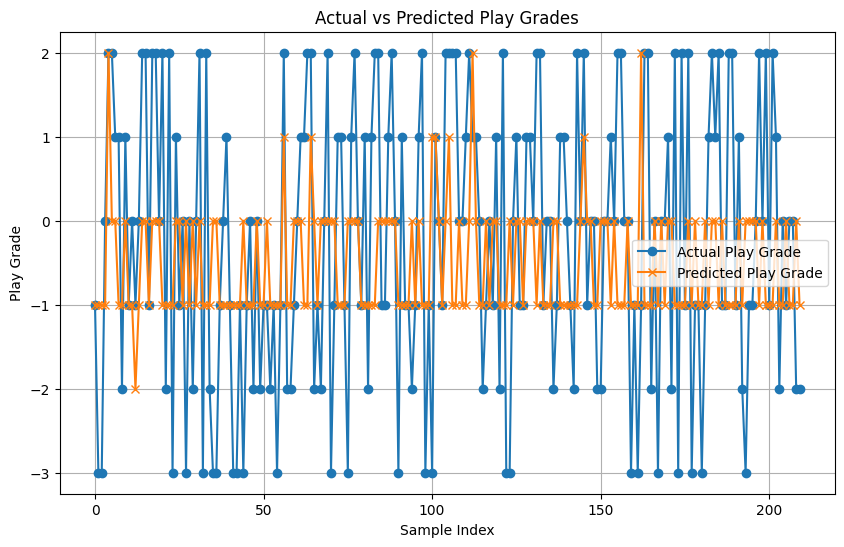

In [26]:

# Create a DataFrame to compare the actual vs predicted values
comparison_df = pd.DataFrame({'Actual Play Grade': y_test, 'Predicted Play Grade': y_pred})

# Print the first few results for comparison
print(comparison_df.head())

# Optionally, visualize the results with a scatter plot or line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Play Grade', marker='o')
plt.plot(y_pred, label='Predicted Play Grade', marker='x')
plt.title('Actual vs Predicted Play Grades')
plt.xlabel('Sample Index')
plt.ylabel('Play Grade')
plt.legend()
plt.grid(True)
plt.show()